In [165]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load train and test datasets

In [166]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

# Add a column to differentiate between train and test datasets

In [167]:
test_df["data_set"] = "test"
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,data_set
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,test
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,test
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,test
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,test
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,test


In [190]:
train_df["data_set"] = "train"
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train,04


# Add placeholder columns for the test set to match the train set structure

In [169]:
temp_test = test_df
temp_test["registered"] = 0
temp_test["count"] = 0
temp_test["casual"] = 0
temp_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,data_set,registered,count,casual
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,test,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,test,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,test,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,test,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,test,0,0,0


# Combine train and test datasets for analysis

In [170]:
fn = pd.concat([train_df,temp_test])
fn.tail()

,atemp,casual,count,data_set,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
6488,12.880,0,0,test,2012-12-31 19:00:00,0,60,0,1,10.66,2,11.0014,1
6489,12.880,0,0,test,2012-12-31 20:00:00,0,60,0,1,10.66,2,11.0014,1
6490,12.880,0,0,test,2012-12-31 21:00:00,0,60,0,1,10.66,1,11.0014,1
6491,13.635,0,0,test,2012-12-31 22:00:00,0,56,0,1,10.66,1,8.9981,1
6492,13.635,0,0,test,2012-12-31 23:00:00,0,65,0,1,10.66,1,8.9981,1


# Plot distributions of key features to understand data trends

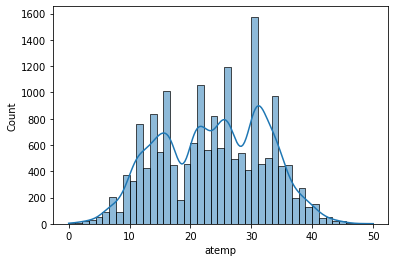

In [171]:
sns.histplot(fn["atemp"], kde = True)

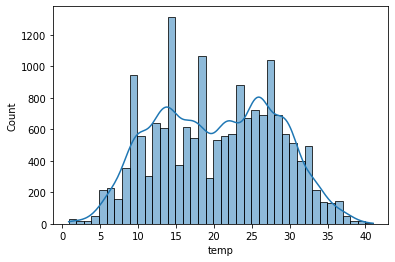

In [172]:
sns.histplot(fn["temp"], kde = True)

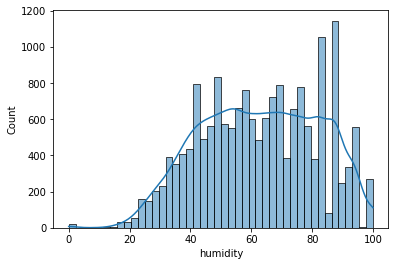

In [173]:
sns.histplot(fn["humidity"], kde = True)

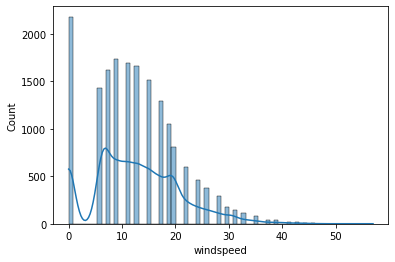

In [174]:
sns.histplot(fn["windspeed"], kde = True)

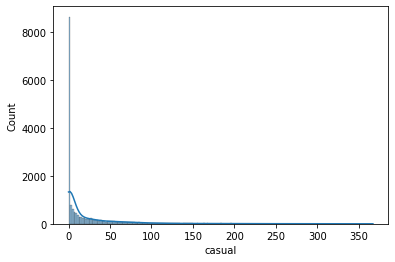

In [175]:
sns.histplot(fn["casual"], kde = True)

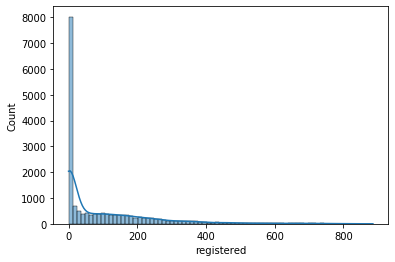

In [176]:
sns.histplot(fn["registered"], kde = True)

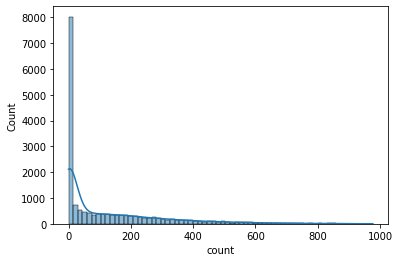

In [177]:
sns.histplot(fn["count"], kde = True)

**Based on the plots above it is apparent that humidity, atemp, and temp have appoximatley normal distributions. While windspeed, casual, registered, and count have distributions that are skewed to the right.**

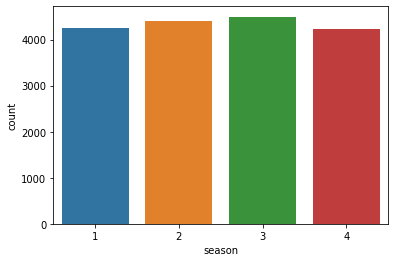

In [178]:
sns.countplot("season", data = fn)

# Extract the hour from the datetime column

In [179]:
fn["hour"] = fn["datetime"].str[11:13]

# Visualize relationships between hour and other features
# E.g., Windspeed variation by hour and working day

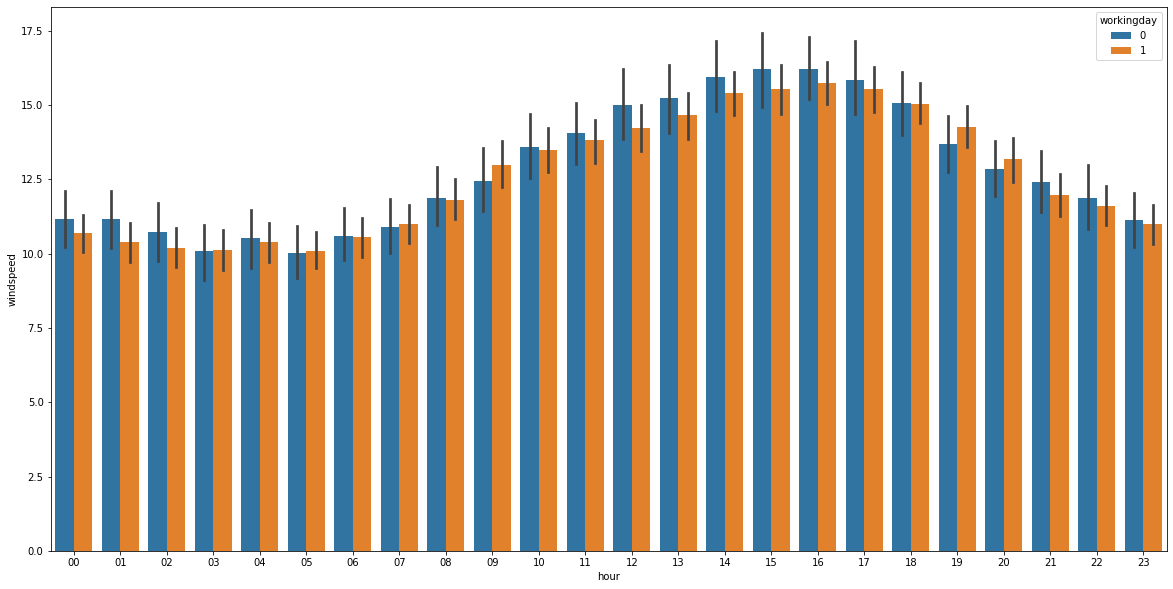

In [180]:
fig,ax = plt.subplots(1,1, figsize = (20,10))
sns.barplot(x="hour", y = "windspeed", ax= ax, hue="workingday", data=fn)

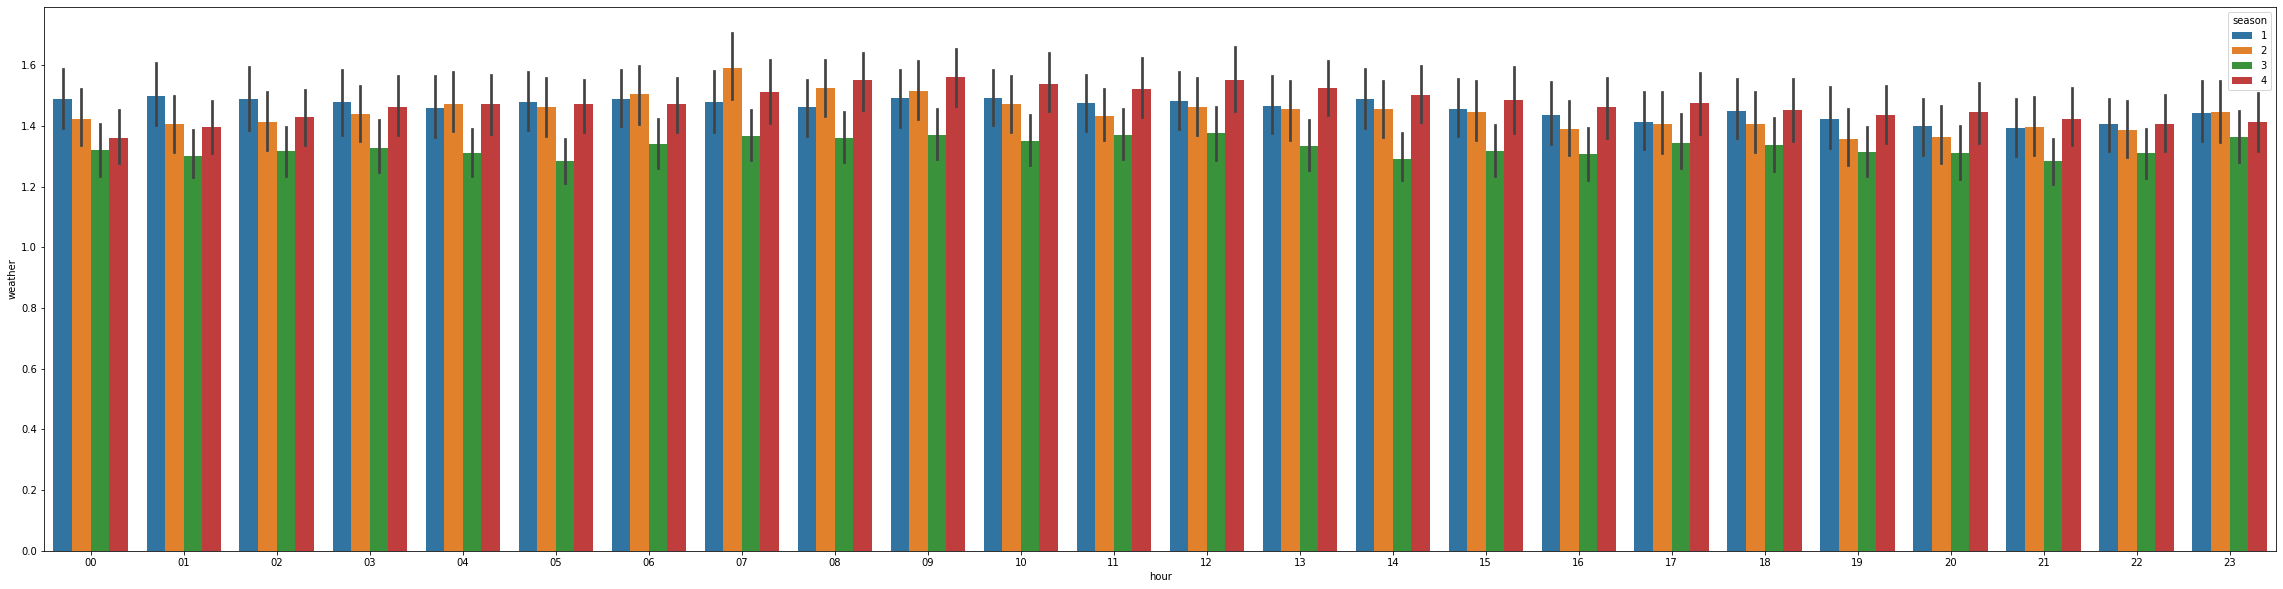

In [181]:
fig,ax = plt.subplots(1,1, figsize = (40,10))
sns.barplot(x="hour", y = "weather", ax= ax, hue="season", data=fn)

**It is apparent that the best weather occurs in the fall between hours 5 and 12 because this is were the weather mean is the lowest indicating better weather.**

In [183]:
from sklearn.model_selection import train_test_split

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,data_set,registered,count,casual
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,test,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,test,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,test,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,test,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,test,0,0,0


In [ ]:
# Drop unnecessary columns to prepare features (X) and target (y)
# - Exclude columns that are not predictive or are leakage features
train_df["hour"] = train_df["datetime"].str[11:13]
X = train_df.drop(['casual', 'registered', 'count', 'data_set', 'datetime'], axis = 1)
y = train_df['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [204]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Initialize the Linear Regression model
lr = LinearRegression()
# Fit the model to the training data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make predictions on the test data
predictions = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
# Calculate the R-squared score to evaluate model performance
r2 = r2_score(y_test,predictions)
print('R-Squared: ', r2)

R-Squared:  0.32749549046818405


In [ ]:
# Analyze feature importance using model coefficients
# Create a table of feature names and their corresponding coefficients
# Display the coefficients to understand which features most influence the target
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table.set_index(0,inplace=True)
coef_table.sort_values('Coefs',ascending=False)

,Coefs
0,
season,23.162553
hour,7.774798
atemp,5.056136
workingday,2.233285
temp,1.377275
windspeed,0.324878
weather,-0.861730
humidity,-2.265563
holiday,-9.397436


The linear regression analysis of the bike rental dataset revealed key insights into the factors influencing rental counts. After preprocessing and feature engineering, the dataset was split into training and testing sets. Exploratory data analysis showed that variables like humidity, atemp, and temp followed approximately normal distributions, while windspeed, casual, registered, and count exhibited right-skewed distributions. Seasonal and hourly patterns were evident, with better weather conditions typically observed during the fall and early hours, as indicated by lower mean weather scores.

The linear regression model was trained to predict bike rental counts and achieved an R^2 score of approximately 0.33, meaning the model explained about 33% of the variance in rental counts. The coefficients of the model provided further insights into the relationships between predictors and bike rentals. Positive coefficients for season, hour, and atemp indicated that these factors contributed to increased rentals, whereas negative coefficients for humidity and holiday suggested reduced rentals under these conditions. Among these, holiday had the most significant negative impact on rental counts, while season had the strongest positive impact, highlighting the importance of both temporal and weather-related factors in predicting bike usage.

Although the model captured some important trends, the relatively low R^2 score indicates room for improvement. The results suggest potential issues, such as non-linear relationships between features and the target variable, interactions between predictors, or noise in the data. Future work could focus on enhancing the model by incorporating additional features, exploring non-linear regression techniques, or utilizing advanced algorithms like random forests or gradient boosting. Despite these limitations, the analysis provided a valuable foundation for understanding the dynamics of bike rentals and highlighted critical factors influencing their demand.